In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [3]:
# Rebuild text
from sklearn_bridge import recreate_text_representation
# take text + labels from train ds
from sklearn_bridge import candidate_dict_to_df

In [4]:
from MLutils import report_to_df, train_evaluate

In [5]:
import sklearn, pickle, time, seaborn
import pandas as pd

In [6]:
with open(path_candidate_dict_pkl, 'rb') as f:
    candidate_dict = pickle.load(f)

for splt in candidate_dict.keys():
    print "Split = %i : imported %i candidates" %(splt, len(candidate_dict[splt].keys()))

Split = 0 : imported 12987 candidates
Split = 1 : imported 3230 candidates
Split = 2 : imported 8335 candidates
Split = 3 : imported 79400 candidates


# Set pipeline options

In [8]:
#TODO: Implement:
# CV n-grams

In [9]:
trimmings = [(False,0), (True,0), (True, 5)]
use_lemmas_ = [True, False]
random_undersample_ = [True]
text_vectorizer_ = [CountVectorizer(binary=True, min_df=3 , stop_words='english', ngram_range=(0,3)),
                    TfidfVectorizer(binary=True, min_df=3 , stop_words='english', ngram_range=(0,3)),
                   ]
lsa_dims = [None]

In [ ]:
# Pipeline for comparing datasets

trimmings = [(False,0), (True,0), (True, 5)]
use_lemmas_ = [True, False]
random_undersample_ = [True]
text_vectorizer_ = [CountVectorizer(binary=True, min_df=3 , stop_words='english', ngram_range=(0,3)),
                    TfidfVectorizer(binary=True, min_df=3 , stop_words='english', ngram_range=(0,3)),
                   ]
lsa_dims = [None]


In [10]:
# select models to train
models = {
    'LogisticRegression': LogisticRegression(),
#     'SVC_linear': SVC(kernel = 'linear'),
# #     'SVC_rbf': SVC(kernel = 'rbf'),
#     'SVC_rbf_C=100': SVC(kernel = 'rbf', C=100),
#     'SVC_rbf_C=500': SVC(kernel = 'rbf', C=500),
#     'SVC_rbf_C=1000': SVC(kernel = 'rbf', C=1000),
#     'kNN_5': KNeighborsClassifier(),
#     'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=5),
}

In [11]:
# pipeline start

In [12]:
from itertools import product

In [13]:
combs = product(trimmings,use_lemmas_, random_undersample_, text_vectorizer_, lsa_dims)
# combs = list(combs)

In [13]:
for comb in combs[0:]:
    (trim_text,trim_window) = comb[0]
    use_lemmas = comb[1]
    random_undersample = comb[2]
    text_vectorizer = comb[3]
    lsa_dims = comb[4]
    #
    
    
    

TypeError: 'itertools.product' object has no attribute '__getitem__'

In [14]:
# Candidate representation
trim_text = False
trim_window = 0
use_lemmas = True

# Class Imbalance handling
random_undersample = True

# Text vectorizer
# options: 
# CountVectorizer (params: binary )
# TfidfVectorizer 
# params (common): df_min, stop_words = 'english'/None 
text_vectorizer = CountVectorizer(binary=True, stop_words='english', ngram_range=(0,3) )

# LSA (params: dim_number / none )
lsa_dims = None #enter nr of dims or None/0

# Combine feature matrices
# TODO: hard to implement in pipeline - maybe as seperate component

# Model selection
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC_linear': SVC(kernel = 'linear'),
#     'SVC_rbf': SVC(kernel = 'rbf'),
    'SVC_rbf_C=100': SVC(kernel = 'rbf', C=100),
    'SVC_rbf_C=500': SVC(kernel = 'rbf', C=500),
    'SVC_rbf_C=1000': SVC(kernel = 'rbf', C=1000),
    'kNN_5': KNeighborsClassifier(),
    'RandomForestClassifier': RandomForestClassifier(n_estimators=100, max_depth=5),
}

In [15]:
pkl_name = 'results_dict,'
if trim_text:
    pkl_name += 'trim='+str(trim_window)+','
if use_lemmas:
    pkl_name += 'lemmas'+','
if random_undersample:
    pkl_name += ',RuS'+','

#CV, TFIDF
if isinstance(text_vectorizer, CountVectorizer):
    pkl_name += ',CV_'+','
elif isinstance(text_vectorizer, TfidfVectorizer):
    pkl_name += ',TfIdf_'+','

if text_vectorizer.binary:
    pkl_name += 'bin_'+','
if text_vectorizer.min_df:
    pkl_name += 'minFreq='+str(text_vectorizer.min_df)+','
if text_vectorizer.stop_words:
    pkl_name += '_stopw='+str(text_vectorizer.stop_words)+','
if text_vectorizer.ngram_range:
    pkl_name += '_ngrams='+str(text_vectorizer.ngram_range)+','

if lsa_dims:
    pkl_name += ','+str(lsa_dims)+','


print 'Saving as: \n'+pkl_name.strip(',')+'.pkl'

Saving as: 
results_dict,lemmas,,RuS,,CV_,bin_,minFreq=1,_stopw=english,_ngrams=(0, 3).pkl


# Load train, dev, test datasets

In [17]:
candidate_dict[0][33].keys()

['gene_idx',
 'cand_id',
 'chem_idx',
 'sent_id',
 'pos_tags',
 'label',
 'words',
 'lemmas',
 'dep_labels',
 'dep_parents',
 'entity_types',
 'doc_id']

In [22]:
# Rebuild text
from sklearn_bridge import recreate_text_representation
# take text + labels from train ds
from sklearn_bridge import candidate_dict_to_df

In [32]:
df_train_sdp = candidate_dict_to_df(candidate_dict[0],trim_text=trim_text, window=trim_window, lemmas = use_lemmas, shortest_dep_path= True)
df_train = candidate_dict_to_df(candidate_dict[0],trim_text=trim_text, window=trim_window, lemmas = use_lemmas, shortest_dep_path= False)
# df_dev = candidate_dict_to_df(candidate_dict[1],trim_text=trim_text, window=trim_window, lemmas = use_lemmas )
# df_test = candidate_dict_to_df(candidate_dict[2],trim_text=trim_text, window=trim_window, lemmas = use_lemmas )


In [34]:
df_train.ix[6,'text']

u'overall , although most ENTITY1 have no effect on GENE - GENE signal , CHEMICAL can bind to and activate the GENE and ENTITY2 - dependent gene expression , and CHEMICAL and CHEMICAL inhibit the GENE catalytic activity . \n'

In [35]:
df_train_sdp.ix[6,'text']

/home/antonis/anaconda2/envs/snorkel27/lib/python2.7/site-packages/ipykernel/__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  if __name__ == '__main__':


u'ENTITY1 have bind activate inhibit expression dependent ENTITY2'

In [84]:
# # DEBUG
# print df_train.ix[5,'text']
# print df_train.head().ix[5,'text']

# df_dev.head()

# Dependency parsing

In [ ]:
# 2 b used:

#                              span_replacement=False,
#                              entity_replacement=True,
#                              as_tokens=False,
#                              replace_conseq_entities=True

In [85]:
sentence = df_train.text[5]

In [86]:
# import spacy

# nlp = spacy.load('en')
# doc = nlp(sentence)
# for chunk in doc.noun_chunks:
#     print(chunk.text, chunk.root.text, chunk.root.dep_,
#           chunk.root.head.text)

(u'We', u'We', u'nsubj', u'report')
(u'ENTITY1', u'ENTITY1', u'nsubj', u'binds')
(u'an antidepressant drug', u'drug', u'appos', u'ENTITY1')
(u'GENE', u'GENE', u'dobj', u'binds')
(u'ENTITY2', u'ENTITY2', u'conj', u'GENE')
(u'their dimerization', u'dimerization', u'dobj', u'triggers')
(u'activation', u'activation', u'conj', u'dimerization')


In [77]:
# token.ancestors

In [87]:
# sentence

u'We report here that ENTITY1 , an antidepressant drug , directly binds GENE and ENTITY2 and triggers their dimerization and activation .'

In [94]:
# candidate_dict[0].keys()

[1,
 2,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 20,
 21,
 22,
 23,
 24,
 31,
 32,
 33,
 34,
 41,
 44,
 47,
 50,
 55,
 56,
 58,
 73,
 74,
 75,
 76,
 77,
 80,
 81,
 100,
 101,
 102,
 106,
 120,
 121,
 122,
 123,
 125,
 127,
 133,
 134,
 135,
 136,
 138,
 140,
 146,
 147,
 148,
 149,
 151,
 153,
 185,
 186,
 187,
 188,
 190,
 192,
 197,
 202,
 203,
 204,
 205,
 206,
 209,
 210,
 213,
 214,
 217,
 218,
 221,
 222,
 223,
 224,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 238,
 239,
 241,
 245,
 246,
 247,
 249,
 253,
 254,
 255,
 256,
 257,
 259,
 268,
 270,
 272,
 274,
 276,
 278,
 279,
 282,
 283,
 291,
 294,
 299,
 301,
 306,
 308,
 310,
 312,
 318,
 319,
 321,
 322,
 323,
 325,
 326,
 327,
 328,
 329,
 330,
 331,
 333,
 341,
 342,
 348,
 349,
 363,
 364,
 365,
 366,
 367,
 393,
 394,
 395,
 396,
 398,
 402,
 411,
 413,
 415,
 422,
 423,
 424,
 425,
 426,
 429,
 430,
 435,
 437,
 439,
 441,
 443,
 445,
 447,
 449,
 451,
 453,
 454,
 455,
 456,
 457,
 458

# !~

In [395]:
from sklearn_bridge import recreate_text_representation

In [363]:
splt_type = 0
map(lambda x: recreate_shortest_dep_path(x) ,candidate_dict[splt_type].values()[5:9])

[[], [], [], []]

** Function shift_indices **

In [374]:
# idx_to_del = [5,1,1,1,1,2,8,13,14,1,11,112]
# gene_idx = 6

In [372]:
# def shift_indices(idx2shift, indices2delete):
#     count = reduce(lambda count, i2del: count + (idx2shift > i2del), indices2delete, 0)
#     return idx2shift - count

In [27]:
a,b = None,None

In [14]:
import spacy,time

In [31]:
start_time = time.time()
nlp = spacy.load('en')
# debug
for i in candidate_dict[0].keys()[:10000]:
    print recreate_text_representation(candidate_dict[0][i], 
                             span_replacement=True,
                             entity_replacement=True,
                             as_tokens=False,
                             replace_conseq_entities=True, 
                            shortest_dep_path=True,
                            nlp = nlp ,
                            )
    
print time.time()-start_time


RESULTS : The ENTITY2 mutation caused a significant decrease in the ENTITY1 channel expression .
ENTITY1 expression in decrease caused mutation ENTITY2

Novel ENTITY1 were designed as potential inhibitiors of ENTITY2 .
ENTITY1 designed as inhibitiors of ENTITY2

We report here that ENTITY1 , an antidepressant drug , directly binds GENE and ENTITY2 and triggers their dimerization and activation .
ENTITY1 binds GENE ENTITY2

We report here that ENTITY1 , an antidepressant drug , directly binds ENTITY2 and GENE and triggers their dimerization and activation .
ENTITY1 binds ENTITY2

This study is the first to identify Class V CGPs with their distinctive CHEMICAL or CHEMICAL linkage between two disubstituted CHEMICAL moieties as a particularly potent class of ENTITY2 modulators and also show that within this core structure , differences in the electronegativity associated with a ENTITY1 atom can be the sole determinant of whether a compound will stimulate or inhibit GENE .
ENTITY1 atom wit

ENTITY1 homeostasis of maintaining play shown ENTITY2

Total blood count , blood indices of CHEMICAL GENE ( GENE GENE , GENE ( GENE GENE , GENE GENE ( GENE GENE , ENTITY1 ( CHEMICAL CHEMICAL , CHEMICAL ( CHEMICAL CHEMICAL , ENTITY2 , GENE GENE GENE GENE GENE GENE GENE , GENE ( GENE GENE , CHEMICAL GENE GENE GENE GENE GENE and GENE GENE ( GENE GENE were assayed .
ENTITY1 GENE CHEMICAL CHEMICAL ENTITY2

Total blood count , blood indices of CHEMICAL GENE ( GENE GENE , ENTITY2 ( GENE GENE , GENE GENE ( GENE GENE , ENTITY1 ( CHEMICAL CHEMICAL , CHEMICAL ( CHEMICAL CHEMICAL , GENE GENE GENE GENE GENE , GENE GENE GENE GENE GENE GENE GENE , GENE ( GENE GENE , CHEMICAL GENE GENE GENE GENE GENE and GENE GENE ( GENE GENE were assayed .
ENTITY1 GENE GENE GENE ENTITY2

Total blood count , blood indices of CHEMICAL GENE ( GENE GENE , GENE ( GENE GENE , GENE GENE ( GENE GENE , ENTITY1 ( CHEMICAL CHEMICAL , CHEMICAL ( CHEMICAL CHEMICAL , GENE GENE GENE GENE GENE , ENTITY2 , GENE ( GENE GENE , CHEMICAL

ENTITY1 GENE GENE ENTITY2

The pretreatment with 20 mg L ( -1 ) ENTITY1 could alleviate the effects of UV-B radiation on the activities of CHEMICAL GENE , GENE GENE , ENTITY2 , and CHEMICAL GENE , promoting CHEMICAL CHEMICAL conversion and protein synthesis in soybean seedlings .
wrong indices. searching sentence for ENTITY1 and ENTITY2
ENTITY1 alleviate effects of radiation on activities of GENE GENE ENTITY2

The pretreatment with 20 mg L ( -1 ) ENTITY1 could alleviate the effects of UV-B radiation on the activities of CHEMICAL GENE , ENTITY2 , GENE GENE , and CHEMICAL GENE , promoting CHEMICAL CHEMICAL conversion and protein synthesis in soybean seedlings .
wrong indices. searching sentence for ENTITY1 and ENTITY2
ENTITY1 alleviate effects of radiation on activities of GENE ENTITY2

Second , ENTITY1 , an antiatherogenic compound reported to be an inactivator of ENTITY2 reduced hepatic CHEMICAL secretion .
ENTITY1 reported reduced inactivator of ENTITY2

Second , CHEMICAL , an antiath

The objective of the current study was to determine whether a low-dose subchronic CHEMICAL treatment ( 100 μg / kg for 8 consecutive days ) exerts long-term effects on apoptosis in the adult rat prefrontal cortex ( PFC ) by examining the expression of cell death-promoting molecules ( ENTITY1 GENE ( GENE GENE , GENE , GENE GENE , cleaved GENE GENE , GENE GENE and cell-survival molecules ( ENTITY2 , GENE GENE .
wrong indices. searching sentence for ENTITY1 and ENTITY2
ENTITY1 GENE cleaved GENE ENTITY2

We then showed that static exposure of embryos to ENTITY1 ( 31.2-500 nM ) from 5 to 96 hpf resulted in significant stage - and concentration-dependent ENTITY2 inhibition , albeit these effects were fully reversible within 48 h following transfer to clean water .
wrong indices. searching sentence for ENTITY1 and ENTITY2
ENTITY1 to embryos of exposure resulted in inhibition ENTITY2

However , ENTITY2 expression is low in most human cells and there are other ENTITY1 metabolizing enzymes that 

ENTITY1 treatment resulted showed treated pigs of lungs in examined observed induced binding DNA ENTITY2

Effect of ENTITY1 on ENTITY2 and GENE activities in the presence of CHEMICAL in rat selected brain and peripheral tissues .
ENTITY1 on ENTITY2

Effect of ENTITY1 on GENE and ENTITY2 activities in the presence of CHEMICAL in rat selected brain and peripheral tissues .
ENTITY1 on GENE ENTITY2

Effect of CHEMICAL on ENTITY2 and GENE activities in the presence of ENTITY1 in rat selected brain and peripheral tissues .
ENTITY1 of presence in activities Effect of CHEMICAL on ENTITY2

Effect of CHEMICAL on GENE and ENTITY2 activities in the presence of ENTITY1 in rat selected brain and peripheral tissues .
ENTITY1 of presence in activities Effect of CHEMICAL on GENE ENTITY2

In this study , we found that ENTITY1 ( CHEMICAL CHEMICAL from Hizikia fusiforme considerably inhibits lipopolysaccharide ( LPS ) - stimulated CHEMICAL production by suppressing the expression of ENTITY2 ( GENE GENE in

ENTITY1 antagonist as identified acts inhibits contraction through stimulation of ENTITY2

These results suggest that CHEMICAL , although identified as a ENTITY1 antagonist , acts as a ENTITY2 agonist and that it inhibits the noncholinergic contraction in guinea-pig airways through stimulation of a prejunctional GENE GENE , located to sensory nerves .
ENTITY1 antagonist as identified acts as agonist ENTITY2

The beneficial role of CHEMICAL on blood pressure , cardiac hypertrophy , vascular ENTITY2 expression , perivascular fibrosis , and impaired CHEMICAL relaxation of isolated aortic rings was completely abrogated by coadministration of ENTITY1 .
ENTITY1 of coadministration by abrogated role on pressure hypertrophy expression ENTITY2

The beneficial role of ENTITY1 on blood pressure , cardiac hypertrophy , vascular ENTITY2 expression , perivascular fibrosis , and impaired CHEMICAL relaxation of isolated aortic rings was completely abrogated by coadministration of CHEMICAL CHEMICAL .
E

KeyError: 2

### other effort

In [340]:
candidate_dict[0][1].keys()

['gene_idx',
 'lemmas',
 'chem_idx',
 'sent_id',
 'pos_tags',
 'label',
 'words',
 'cand_id',
 'entity_types',
 'doc_id']

In [358]:
def recreate_shortest_dep_path(candidate):
    debug = False
    #parse in spaCy
    doc = nlp(' '.join(candidate['words']))
    
    #TODO create list of words in entity to throw out of the BOW
    entity_words = set()
    
    bow = set()
    
    for T1 in candidate['chem_idx']:
        entity_words.add(candidate['words'][T1])
        
        for T2 in candidate['gene_idx']:
            entity_words.add(candidate['words'][T2])
            
            root_idx = doc.get_lca_matrix()[T1,T2]
            # delete prev graph
            g = nx.Graph()
            g = g = childIterator(doc[root_idx], level=0)
            if debug:
                nx.draw_networkx(g)
            bow1 = set(shortest_path(g)[candidate['words'][T1]][candidate['words'][T2]])
            bow.union(bow1)
    return list(bow.difference(entity_words))
    

In [352]:
for candidate in candidate_dict[0]:
    print candidate.id

AttributeError: 'int' object has no attribute 'id'

In [ ]:
map(lambda x: recreate_shortest_dep_path(x), candidate_dict[0])

candidate_dict[0]

# textaCy

In [188]:
# """
# Represent documents as semantic networks, where nodes are individual terms or
# whole sentences.
# """
# import collections
# import itertools
# import logging,sys

# from cytoolz import itertoolz
# import networkx as nx
# from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# from spacy.tokens.span import Span as SpacySpan
# from spacy.tokens.token import Token as SpacyToken

# is_python2 = int(sys.version[0]) == 2

# if is_python2:
#     unicode_ = unicode

# def terms_to_semantic_network(terms,
#                               normalize='lower',
#                               window_width=100,
#                               edge_weighting='binary'):
#     """
#     Convert an ordered list of non-overlapping terms into a semantic network,
#     where each term is represented by a node with edges linking it to other terms
#     that co-occur within ``window_width`` terms of itself.

#     Args:
#         terms (List[str] or List[``spacy.Token``])
#         normalize (str or callable): if 'lemma', lemmatize terms; if 'lower',
#             lowercase terms; if false-y, use the form of terms as they appear
#             in doc; if a callable, must accept a ``spacy.Token`` and return a
#             str, e.g. :func:`textacy.spacy_utils.normalized_str()`;
#             only applicable if ``terms`` is a List[``spacy.Token``]
#         window_width (int, optional): size of sliding window over `terms` that
#             determines which are said to co-occur; if = 2, only adjacent terms
#             will have edges in network
#         edge_weighting (str {'cooc_freq', 'binary'}, optional): if 'binary',
#             all co-occurring terms will have network edges with weight = 1;
#             if 'cooc_freq', edges will have a weight equal to the number of times
#             that the connected nodes co-occur in a sliding window

#     Returns:
#         :class:`networkx.Graph <networkx.Graph>`: nodes are terms, edges are for
#             co-occurrences of terms

#     Notes:
#         - Be sure to filter out stopwords, punctuation, certain parts of speech, etc.
#           from the terms list before passing it to this function
#         - Multi-word terms, such as named entities and compound nouns, must be merged
#           into single strings or spacy.Tokens beforehand
#         - If terms are already strings, be sure to have normalized them so that
#           like terms are counted together; for example, by applying
#           :func:`normalized_str() <textacy.spacy_utils.normalized_str>`
#     """
#     if window_width < 2:
#         raise ValueError('Window width must be >= 2')
#     if not terms:
#         raise ValueError('`terms` list is empty; it must contain 1 or more terms')

#     # if len(terms) < window_width, cytoolz throws a StopIteration error
#     # which we don't want
#     if len(terms) < window_width:
# #         LOGGER.warning(
# #             'input terms list is smaller than window width (%s < %s)',
# #             len(terms), window_width)
#         window_width = len(terms)

#     if isinstance(terms[0], unicode_):
#         windows = itertoolz.sliding_window(window_width, terms)
#     elif isinstance(terms[0], SpacyToken):
#         if normalize == 'lemma':
#             windows = ((tok.lemma_ for tok in window)
#                        for window in itertoolz.sliding_window(window_width, terms))
#         elif normalize == 'lower':
#             windows = ((tok.lower_ for tok in window)
#                        for window in itertoolz.sliding_window(window_width, terms))
#         elif not normalize:
#             windows = ((tok.text for tok in window)
#                        for window in itertoolz.sliding_window(window_width, terms))
#         else:
#             windows = ((normalize(tok) for tok in window)
#                        for window in itertoolz.sliding_window(window_width, terms))
#     else:
#         msg = 'Input terms must be strings or spacy Tokens, not {}.'.format(type(terms[0]))
#         raise TypeError(msg)

#     graph = nx.Graph()

#     if edge_weighting == 'cooc_freq':
#         cooc_mat = collections.defaultdict(lambda: collections.defaultdict(int))
#         for window in windows:
#             for w1, w2 in itertools.combinations(sorted(window), 2):
#                 cooc_mat[w1][w2] += 1
#         graph.add_edges_from(
#             (w1, w2, {'weight': cooc_mat[w1][w2]})
#             for w1, w2s in cooc_mat.items() for w2 in w2s)

#     elif edge_weighting == 'binary':
#         graph.add_edges_from(
#             w1_w2 for window in windows
#             for w1_w2 in itertools.combinations(window, 2))

#     return graph

In [189]:
# terms = candidate_dict[0][1]['words']
# graph = terms_to_semantic_network(terms, normalize='lower', edge_weighting='binary',)

# JJ

In [267]:
from networkx import shortest_path
def childIterator(root, level = 0, parent = "", debug=False):      
#     global c
    if debug:
        print "\t" * level, "-", parent
#     c+= 1
    if parent:
        g.add_edge(parent.norm_, root.norm_)
    for child in root.children:
        childIterator(child, level + 1, root)
    return g

In [251]:
# put in spaCy

In [280]:
def get_shortest_dep_path(sentence, T1, T2):
    #parse in spaCy
    doc = nlp(sentence)
    # TODO optimize that
    if (doc[T1] == 'ENTITY1') & (doc[T1] == 'ENTITY1'):
        pass
    else: #search
        for token in doc:
            if token.text == 'ENTITY1':
                T1 = token.i
            elif token.text == 'ENTITY2':
                T2 = token.i
            
    root_idx = doc.get_lca_matrix()[T1,T2]
    # delete prev graph
    g = nx.Graph()
    g = g = childIterator(doc[root_idx], level=0)
    # nx.draw_networkx(g)
    short_sent = shortest_path(g)['ENTITY1']['ENTITY2']
    return ' '.join(short_sent)

In [279]:
# df_train_dev.text[8]

In [ ]:
# map(,df_train.text)

# Label distribution investigate

In [13]:
# df_train.label.value_counts()
# df_dev.label.value_counts()
# df_train_dev.label.value_counts()
# df_test.label.value_counts()

### Check if I drop duplicates
(if label col is ignored, basically drops cands inside the same sentences)

In [14]:
# print "Train+dev:\n",df_train_dev.drop_duplicates(subset=['sent_id']).label.value_counts()
# print "Test:\n",df_test.drop_duplicates(subset=['sent_id']).label.value_counts()

# Load dataset

In [20]:


# create train/test set
df_train = candidate_dict_to_df(candidate_dict[0],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ,shortest_dep_path = False)
df_val = candidate_dict_to_df(candidate_dict[1],trim_text=trim_text, window=trim_window, lemmas =  use_lemmas,shortest_dep_path = False )
df_test = candidate_dict_to_df(candidate_dict[2],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ,shortest_dep_path = False)
df_unlab = candidate_dict_to_df(candidate_dict[3],trim_text=trim_text, window=trim_window, lemmas = use_lemmas ,shortest_dep_path = False)


KeyError: 3

# Build a BOW classifier

In [18]:

# text 2 matrix (CV/TF-idf)
X_train = text_vectorizer.fit_transform(df_train.text)
y_train = df_train.label

X_val = text_vectorizer.transform(df_val.text)
y_val = df_val.label

X_test = text_vectorizer.transform(df_test.text)
y_test = df_test.label

X_unlab = text_vectorizer.transform(df_unlab.text)
y_unlab = df_unlab.label


NameError: name 'df_val' is not defined

In [ ]:

# LSA
if lsa_dims: #TODO save in diff. matrix to append later?
    svd = TruncatedSVD(n_components=lsa_dims)
    X_train = svd.fit_transform(X_train)
    X_val = svd.transform(X_val)
    X_test = svd.transform(X_test)
    X_unlab = svd.transform(X_unlab)

# undersampling
if random_undersample:
    import imblearn
    from collections import Counter
    from imblearn.under_sampling import RandomUnderSampler
#         print('Original dataset shape {}'.format(Counter(y_train)))
    rus = RandomUnderSampler(random_state=42)
    X_train, y_train = rus.fit_sample(X_train, y_train)
#         print('Resampled dataset shape {}'.format(Counter(y_train)))

# train/predict, construct results_dict
results_dict = dict()
for model_name,model in models.iteritems():
#         print 'Training',model_name
#         start_time = time.time()

    try:
        model.probability = True
    except:
        pass

    #train & predict
    model.fit(X_train,y_train)
    # val predictions
    y_val_pred_bin = model.predict(X_val)
    y_val_pred_prob = pd.Series(map(lambda x: x[0],model.predict_proba(X_val)),index=y_val.index).to_dict()
    # test predictions
    y_test_pred_bin = model.predict(X_test)
    y_test_pred_prob = pd.Series(map(lambda x: x[0],model.predict_proba(X_test)),index=y_test.index).to_dict()
    # unlab set predictions
    y_unlab_pred_bin = model.predict(X_unlab)
    y_unlab_pred_prob = pd.Series(map(lambda x: x[0],model.predict_proba(X_unlab)),index=y_unlab.index).to_dict()

    #TODO: get probability labels in consistent way. which class is true if proba > 0.5???

    # TODO: do smth for later, when true lbls not in place.

    # calculate some metrics
    class_report = report_to_df(classification_report(y_val, y_val_pred_bin))
#         conf_matrix = confusion_matrix(y_val, y_val_pred_bin)

    results_dict[model_name] = {"label_val_binary" : y_val_pred_bin,
                                "label_val_prob_dict" : y_val_pred_prob,
                                "label_test_binary" : y_test_pred_bin,
                                "label_test_prob_dict" : y_test_pred_prob,
                                "label_unlab_binary" : y_unlab_pred_bin,
                                "label_unlab_prob_dict" : y_unlab_pred_prob,
                                #only possible when true labels in place:
#                                     "confusion_matrix" : conf_matrix,
                                "classification_report": class_report,
#                                 "precision": class_report.loc['avg/total','precision'],
#                                 "recall": class_report.loc['avg/total','recall'],
                                "f1+": class_report.loc['1','f1-score'],

                               }
#         print "%s done. (%.2f sec)"%(model_name,time.time()-start_time)


In [315]:
X_train_dev

NameError: name 'X_train_dev' is not defined

In [36]:
from sklearn.decomposition import TruncatedSVD

In [38]:
# LSA
svd = TruncatedSVD(n_components=100)

X_train_dev = svd.fit_transform(X_train_dev)
X_test = svd.transform(X_test)

## Balance train+dev dataset

In [39]:
if random_undersample:
    import imblearn
    from collections import Counter
    from imblearn.under_sampling import RandomUnderSampler
    print('Original dataset shape {}'.format(Counter(y_train_dev)))
    rus = RandomUnderSampler(random_state=42)
    X_train_dev, y_train_dev = rus.fit_sample(X_train_dev, y_train_dev)
    print('Resampled dataset shape {}'.format(Counter(y_train_dev)))


Original dataset shape Counter({-1: 8726, 1: 3180})
Resampled dataset shape Counter({1: 3180, -1: 3180})


In [40]:
from sklearn.metrics import classification_report, confusion_matrix

## Model training & prediction

In [41]:
results_dict = dict()
for model_name,model in models.iteritems():
    print 'Training',model_name
    start_time = time.time()

    try:
        model.probability = True
    except:
        pass
    
    model.fit(X_train_dev,y_train_dev)
    y_pred_bin = model.predict(X_test)
    
    #TODO: get probability labels in consistent way. which class is true if proba > 0.5???

    #turned into dict for fast iteration in snorkel
    y_pred_prob = pd.Series(map(lambda x: x[0],model.predict_proba(X_test)),index=y_test.index).to_dict()
    
    # TODO: do smth for later, when true lbls not in place.
    class_report = report_to_df(classification_report(y_test, y_pred_bin))
    conf_matrix = confusion_matrix(y_test, y_pred_bin)
    
    results_dict[model_name] = {"label_binary" : y_pred_bin,
                                "label_prob_dict" : y_pred_prob,
                                #only possible when true labels in place:
                                "confusion_matrix" : conf_matrix,
                                "classification_report": class_report,
#                                 "precision": class_report.loc['avg/total','precision'],
#                                 "recall": class_report.loc['avg/total','recall'],
                                "f1+": class_report.loc['1','f1-score'],
                                
                               }
    print "%s done. (%.2f sec)"%(model_name,time.time()-start_time)

Training SVC_rbf_C=500
SVC_rbf_C=500 done. (38.35 sec)
Training LogisticRegression
LogisticRegression done. (0.11 sec)
Training SVC_rbf_C=100
SVC_rbf_C=100 done. (31.32 sec)
Training SVC_rbf_C=1000
SVC_rbf_C=1000 done. (47.88 sec)
Training RandomForestClassifier
RandomForestClassifier done. (2.52 sec)
Training SVC_linear
SVC_linear done. (24.21 sec)
Training kNN_5
kNN_5 done. (11.29 sec)


In [25]:
# #save predictions in dict

# with open(path_base_learners+pkl_name+'.pkl', 'wb') as f:
#     pickle.dump(results_dict,f)

In [42]:
#check model performance
for model_name in results_dict.keys():
    print model_name
    print results_dict[model_name]['classification_report']

SVC_rbf_C=500
           precision  recall  f1-score  support
Classes                                        
-1              0.89    0.71      0.79     4281
1               0.48    0.74      0.58     1500
avg/total       0.78    0.72      0.74     5781
LogisticRegression
           precision  recall  f1-score  support
Classes                                        
-1              0.87    0.74      0.80     4281
1               0.48    0.70      0.57     1500
avg/total       0.77    0.73      0.74     5781
SVC_rbf_C=100
           precision  recall  f1-score  support
Classes                                        
-1              0.89    0.72      0.80     4281
1               0.49    0.76      0.59     1500
avg/total       0.79    0.73      0.74     5781
SVC_rbf_C=1000
           precision  recall  f1-score  support
Classes                                        
-1              0.88    0.71      0.79     4281
1               0.47    0.73      0.58     1500
avg/total       0.78    0.

# Explore diversity between classifiers

In [43]:
# from sklearn.metrics import cohen_kappa_score
# from matplotlib import pyplot as plt

In [44]:
from MLutils import  diversity_heatmap

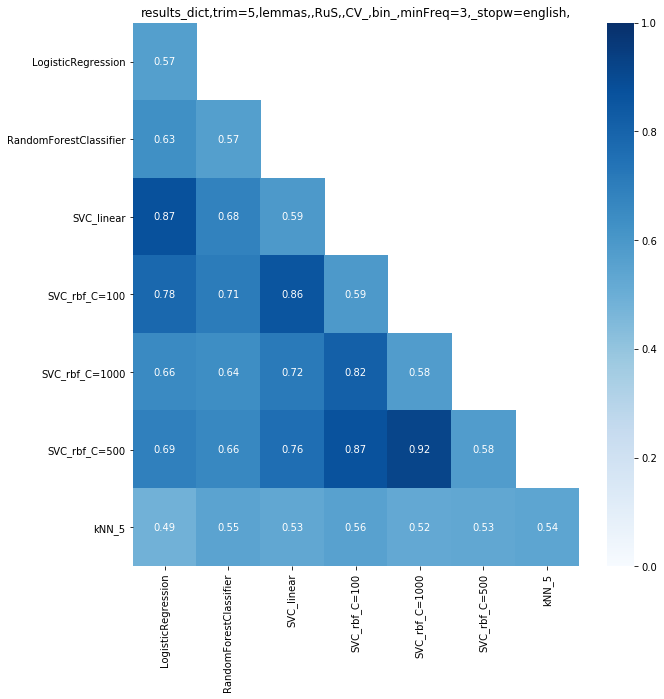

In [45]:
diversity_heatmap(results_dict, title = pkl_name)

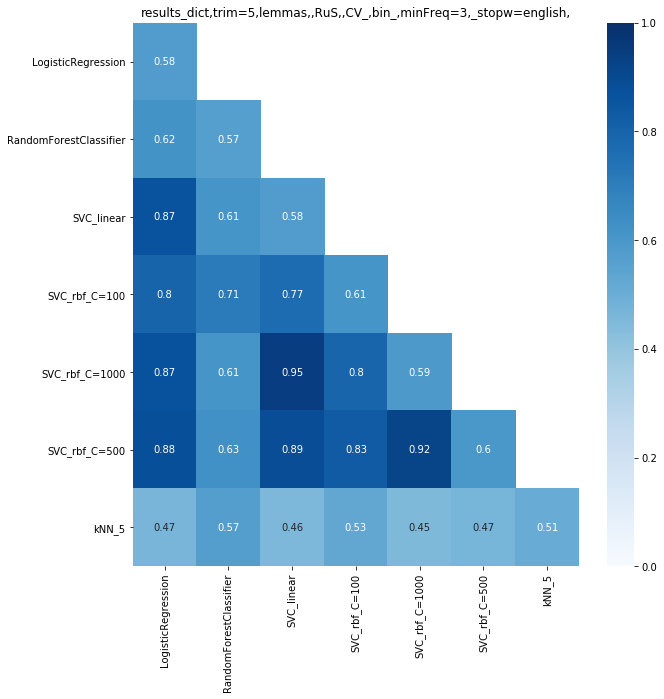

In [29]:
diversity_heatmap(results_dict, title = pkl_name)

In [32]:
# #whats going on with svc poly etc

# cohen_kappa_score(results_dict['SVC_poly3_C=100']['label_binary'],
#                  results_dict['SVC_poly3_C=1000']['label_binary'])
# #bcause results are same -> nan ?? 


In [37]:
# results_a = SVC(kernel = 'rbf', C=1000).fit(X_train_dev,y_train_dev).predict(X_test)
# results_b = SVC(kernel = 'linear').fit(X_train_dev,y_train_dev).predict(X_test)


In [28]:
# ## Check cohens kappa for individual models
# def cohens_kappa_quick_check(model1,model2):
#     """
#     Returns Cohens kappa interannotator agreement between on two models
#     (after training on dev+train and predicting in X_test)
#     """
#     results_a = model1.fit(X_train_dev,y_train_dev).predict(X_test)
#     results_b = model2.fit(X_train_dev,y_train_dev).predict(X_test)
#     return cohen_kappa_score(results_a, results_b)


# cohens_kappa(SVC(kernel = 'rbf', C=1000),
#              SVC(kernel = 'linear'))

# cohens_kappa(SVC(kernel = 'rbf', C=1000),
#              SVC(kernel = 'rbf', C=500),
#             )